In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [59]:
df = pd.read_excel("mark_VS_rank.xlsx")
df.to_csv("output.csv", index=False)

<Axes: xlabel='MARKS', ylabel='RANK'>

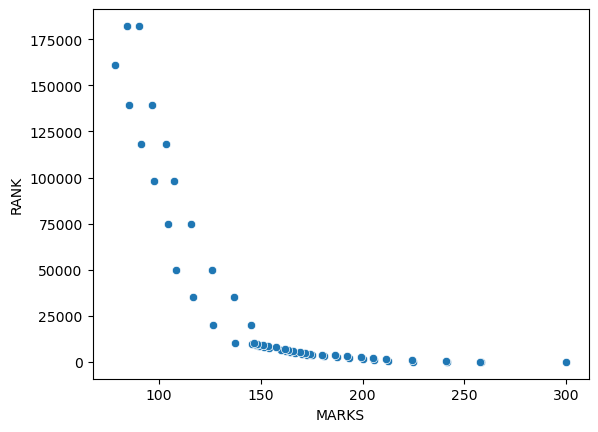

In [60]:
df["MARKS"] = df["MARKS"]/(1.2)
sns.scatterplot(x =df["MARKS"],y = df["RANK"])


<Axes: xlabel='MARKS', ylabel='Density'>

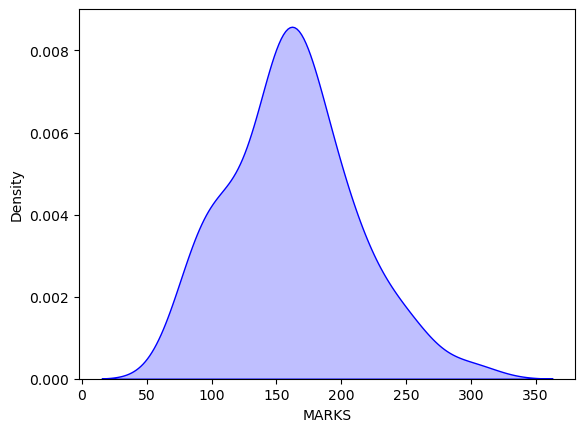

In [61]:
sns.kdeplot(df["MARKS"], fill=True, color="blue")

In [62]:
Y_log = np.log(df["RANK"])
 

Estimated Equation: RANK = 4102187.3851 * e^(-0.0394 * MARKS)
Mean Squared Error on Test Set: 281089967.2911


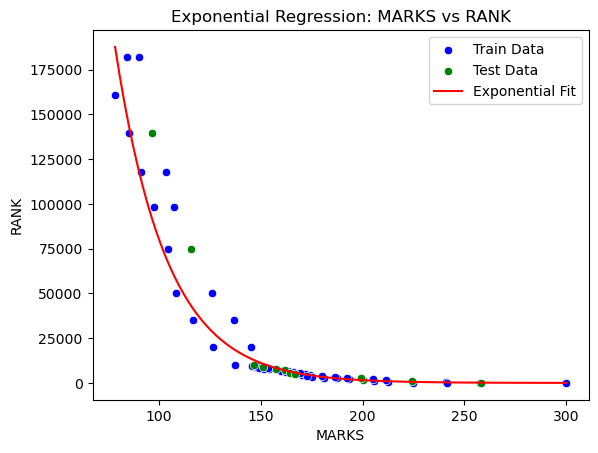

In [63]:
X = df[["MARKS"]]
Y = df["RANK"]
X_train, X_test, Y_train_log, Y_test_log = train_test_split(X, Y_log, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train_log)

b = model.coef_[0]
ln_a = model.intercept_
a = np.exp(ln_a)

print(f"Estimated Equation: RANK = {a:.4f} * e^({b:.4f} * MARKS)")

Y_test_pred_log = model.predict(X_test)
Y_test_pred = np.exp(Y_test_pred_log)

mse = mean_squared_error(np.exp(Y_test_log), Y_test_pred)
print(f"Mean Squared Error on Test Set: {mse:.4f}")

X_curve = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
Y_curve = a * np.exp(b * X_curve)

sns.scatterplot(x=X_train["MARKS"], y=np.exp(Y_train_log), color="blue", label="Train Data")
sns.scatterplot(x=X_test["MARKS"], y=np.exp(Y_test_log), color="green", label="Test Data")
plt.plot(X_curve, Y_curve, color="red", label="Exponential Fit")
plt.xlabel("MARKS")
plt.ylabel("RANK")
plt.legend()
plt.title("Exponential Regression: MARKS vs RANK")
plt.show()

In [83]:
print("What are your expected marks:")
a = int(input())
if(a>360 or a<0):
    print("Marks cannot be greater than 360 or less than 0")
else:
    a = [[a]]
    b = model.predict(a)
    b = 4.7*int(np.exp(b[0]))
    c = (175000-(b/5.8))/1750
    print(f"Expected rank in your jee main 2020 is {b}")
    print(f"Expected percentile in you jee main 2020 is {c}")
    

What are your expected marks:


 201


Expected rank in your jee main 2020 is 7035.900000000001
Expected percentile in you jee main 2020 is 99.3068078817734


C:\Users\Akshat Bhatt\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
